# About one in Seven adults has diabetes now, So here i tried to build a model which preicts how mand Diabetes patients are there among the given datasets.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")

In [4]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
print("Dimensions of diabetes: {}".format(df.shape))

Dimensions of diabetes: (768, 9)


In [7]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


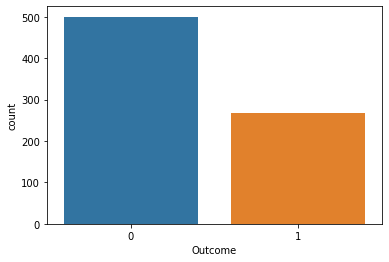

In [9]:
sns.countplot(df['Outcome'],label="Count")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# K- Nearest Neighbours Algorithm

#The KNN algorihtm is the simples machine learning algorithm. Building the model by this algorithm consists only of storing
#the training data set. To make a prediction for a new data point, this algorithm finds the closest data points in the training data set i.e "nearest neighbours"

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df.drop("Outcome",axis=1)
y=df['Outcome']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=df['Outcome'],random_state=66)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
training_accuracy=[]

In [35]:
test_accuracy=[]

In [36]:
#try n_neighbors from 1 to 10

In [37]:
neighbors_setting=range(1,11)

In [38]:
for n_neighbors in neighbors_setting:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    #record of training set accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    #record of testing data set of accuracy
    test_accuracy.append(knn.score(x_test,y_test))
    

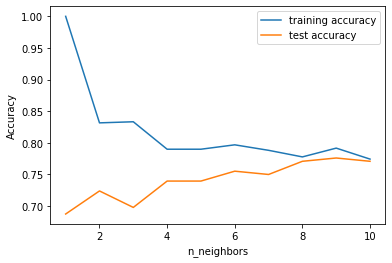

In [39]:
plt.plot(neighbors_setting,training_accuracy, label="training accuracy")
plt.plot(neighbors_setting,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#Here, the above plot shows that the training and test set accuraccy on the y-axis against the setting of n_neighbors on the x-axis.
So, if we choose the one single nearest neighbor, the prediction on training set is perfect. But when more neighbors are considered,
the training accuracy lows down, showing that using the single nearest neighbor leads ro a model that is too complex.

In [40]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [54]:
print("Accuracy of K-NN classifier on training set: {:.3f}".format(knn.score(x_train,y_train)))
print("Accuracy of K-NN classifier on testing ste:{:.3f}".format(knn.score(x_test,y_test)))

Accuracy of K-NN classifier on training set: 0.792
Accuracy of K-NN classifier on testing ste:0.776


# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr=LogisticRegression().fit(x_train,y_train)

In [45]:
print("Training set score: {:.3f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.3f}".format(lr.score(x_test, y_test)))

Training set score: 0.785
Test set score: 0.771


#The default value of C=1 which provide 78% accuracy on training set and 77% accuracy on the test set

In [48]:
lr1 = LogisticRegression(C=0.01).fit(x_train, y_train)
print("Training set accuracy: {:.3f}".format(lr1.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(lr1.score(x_test, y_test)))

Training set accuracy: 0.762
Test set accuracy: 0.760


By using C=0.01 gives us the result in low accuracy on both training and testing sets.

In [55]:
lr2 = LogisticRegression(C=100).fit(x_train, y_train)
print("Training set accuracy: {:.3f}".format(lr2.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(lr2.score(x_test, y_test)))

Training set accuracy: 0.783
Test set accuracy: 0.781


#Using C=100 we get little bit higher accuracy on the training set and little bit lower accuracy on test set, 
So considering that less regularization and a more complex model may not generalize better model

Therefore we should choose default value C=1

In [73]:
df_features = [x for i,x in enumerate(df.columns) if i!=8]

# Decision Tree 

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [60]:
print("Accuracy on training set : {:.3f}".format(dt.score(x_train,y_train)))
print("Accuracy on testing set : {:.3f}".format(dt.score(x_test,y_test)))

Accuracy on training set : 1.000
Accuracy on testing set : 0.714


#The accuracy on training set is 100% but the test set accuracy is not good. This indicates that the tree is Overfitting.
Therefor here we need to apply pre-pruning to the tree

In [65]:
#Now we are going to set the max_depth=3, i.e we are going to limit the depth of the tree to decrease the Overfitting
dt=DecisionTreeClassifier(max_depth=3,random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [66]:
print("Accuracy on testing set: {:.3f}".format(dt.score(x_train,y_train)))
print("Accuracy on testing set: {:.3f}".format(dt.score(x_test,y_test)))

Accuracy on testing set: 0.773
Accuracy on testing set: 0.740


In [64]:
#This leads to lower the accuracy but we can see an improvement on the test set.

#Feature importance in Decision Trees

In [67]:
print("Feature importance:\n{}".format(dt.feature_importances_))

Feature importance:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


#Feature importance rates how import each feature is for the decision a treemakes. 
It is a number from 0 to 1 for eact feature. 0 means "not used at all" and 1 means "Perfectly used for predicting the target"

In [68]:
#Now we can visualize the feature importances

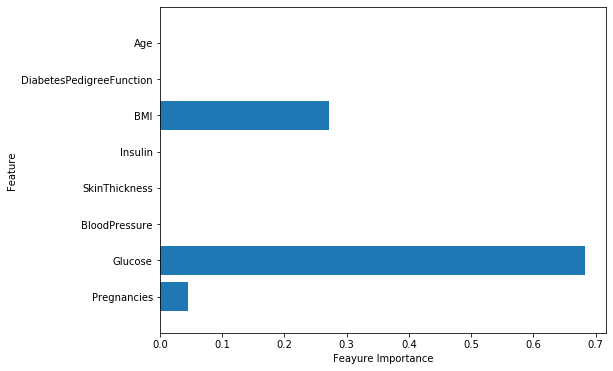

In [74]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features=8
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),df_features)
    plt.xlabel("Feayure Importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
plot_feature_importances_diabetes(dt)

In [75]:
#Glucose is the most Important feature

# Random Forest

In [76]:
#Applying a random forest consisiting of 100 trees

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [79]:
print("Accuracy on training set:{:.3f}".format(rf.score(x_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(rf.score(x_test,y_test)))

Accuracy on training set:1.000
Accuracy on testing set:0.786


#The random forest gives us an accuracy of 78.6%, which is better than logistic regression model or singl decision tree.
However we can also try to fit model by adjusting max_features setting.

In [86]:
rf1=RandomForestClassifier(max_depth=3,n_estimators=100,random_state=0)
rf1.fit(x_train,y_train)
print("Accuracy on training set:{:.3f}".format(rf1.score(x_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(rf1.score(x_test,y_test)))

Accuracy on training set:0.800
Accuracy on testing set:0.755


In [87]:
#By comparing this and default parameter of random forest, Default random forest works well.

# Feature importance in Random Forest

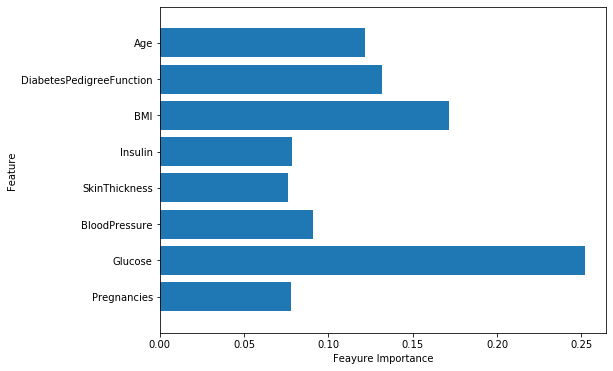

In [90]:
plot_feature_importances_diabetes(rf)

#Similarly, like Single Decision tree gives importance to Glucose feature, Random forest also gives importance to Glucose features,
but it also chooses "BMI" as the second important feature.

# Gradient Boosting

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
gb=GradientBoostingClassifier(random_state=0)
gb.fit(x_train,y_train)
print("Accuracy on training set:{:.3f}".format(gb.score(x_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(gb.score(x_test,y_test)))

Accuracy on training set:0.917
Accuracy on testing set:0.792


In [93]:
#Here our model is slightly overfiting. To reduce overfitting we could either apply pre-pruning by limiting depth or lower the learning rate

In [97]:
gb1=GradientBoostingClassifier(random_state=0,max_depth=1)
gb1.fit(x_train,y_train)
print("Accuracy on training set:{:.3f}".format(gb1.score(x_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(gb1.score(x_test,y_test)))

Accuracy on training set:0.804
Accuracy on testing set:0.781


In [98]:
gb2=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gb2.fit(x_train,y_train)
print("Accuracy on training set:{:.3f}".format(gb2.score(x_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(gb2.score(x_test,y_test)))

Accuracy on training set:0.802
Accuracy on testing set:0.776


#Both methods are decreasing the complexity of the model by reducing the accuracy oof training set. 
Lets see the important features

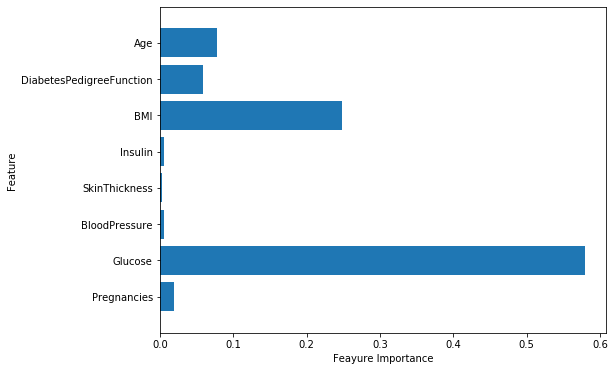

In [103]:
plot_feature_importances_diabetes(gb1)

In [104]:
#So here also the importamt feature is Glucose and Second is BMI

# Support Vector Machine

In [105]:
from sklearn.svm import SVC

In [107]:
svc=SVC()
svc.fit(x_train,y_train)
print("Accuracy on training set:{:.2f}".format(svc.score(x_train,y_train)))
print("Accuracy on testing set:{:.2f}".format(svc.score(x_test,y_test)))

Accuracy on training set:0.77
Accuracy on testing set:0.76


In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
svc = SVC()
svc.fit(x_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test_scaled, y_test)))

Accuracy on training set: 0.79
Accuracy on test set: 0.80


#Scaling the data made a huge diffenrebce. Now our model is actually underfitting, where the training and test set performance are quite similar 
but less close to 100% accuracy.
So now lets try increasing C to fit a complex model.

In [110]:
svc = SVC(C=1000)
svc.fit(x_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(x_test_scaled, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.724


# Increaing C allows us to improve the model, resulting in 72.4% test set accuracy.